In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
#import data in csv

dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
def Rating(val):
    val=str(val).split('/')
    val=val[0];
    return float(val)
 
dataframe['rate']=dataframe['rate'].apply(Rating)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

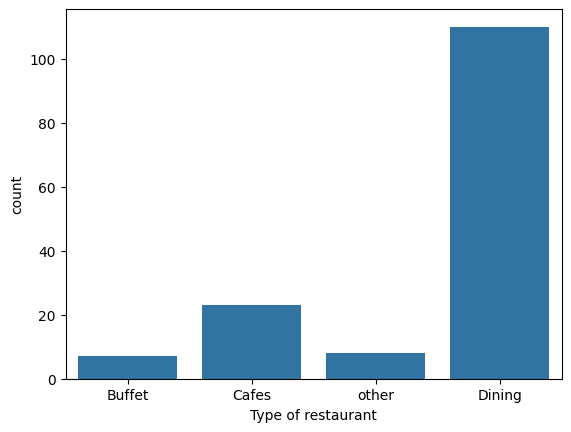

In [8]:
#greater number of restaurants provide online delivery as opposed to offline services

sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'Votes')

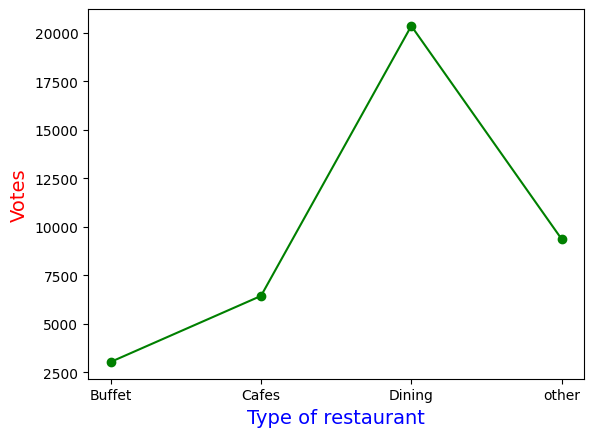

In [19]:
#types of restaurants are the most favored by the general public.

grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()      # groupby by listed_in(type) and votes, then sum of votes
result = pd.DataFrame({'votes': grouped_data})      # its create dictionary of grouped data of votes vs listed_in(type)
print(result)
#plotting the graphs

plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="blue", size=14)
plt.ylabel("Votes", c="red", size=14)

In [21]:
#maximum votes to restaurant

max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object
<class 'pandas.core.series.Series'>


<Axes: xlabel='online_order', ylabel='count'>

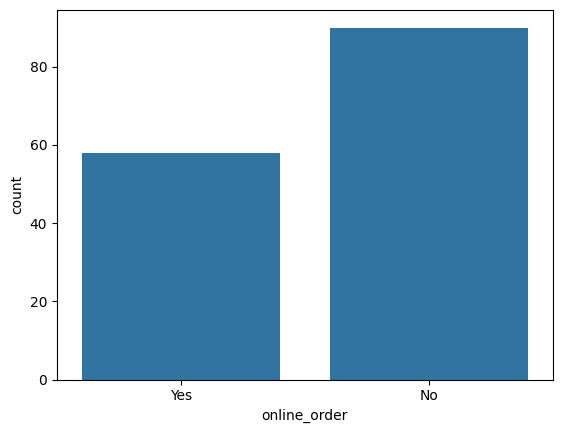

In [23]:
# checking how many customers order online and offline

sns.countplot(x=dataframe['online_order'])

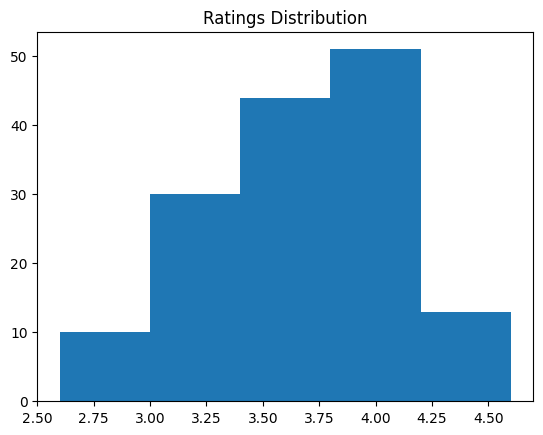

In [24]:
#majority of restaurants received ratings ranging

plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

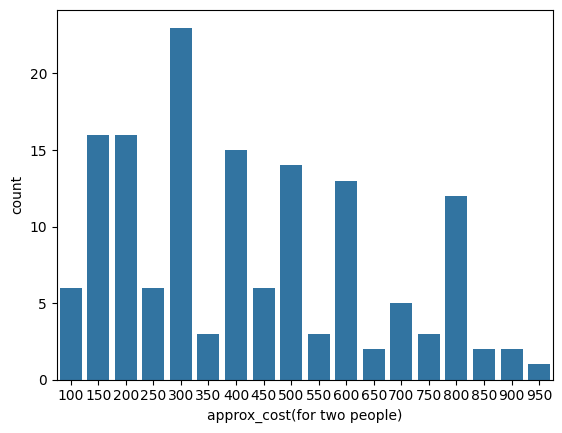

In [25]:
#Let’s explore the approx_cost(for two people) column

couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

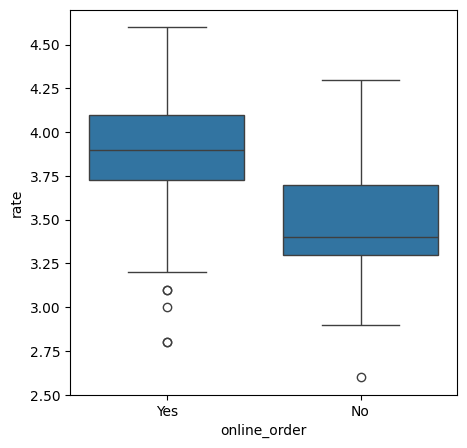

In [28]:
#Now we will examine whether online orders receive higher ratings or offline orders.

plt.figure(figsize = (5,5))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)